In [179]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# yahoo finance is used to fetch data
import yfinance as yf

import datetime as dt
current_date = dt.datetime.now()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


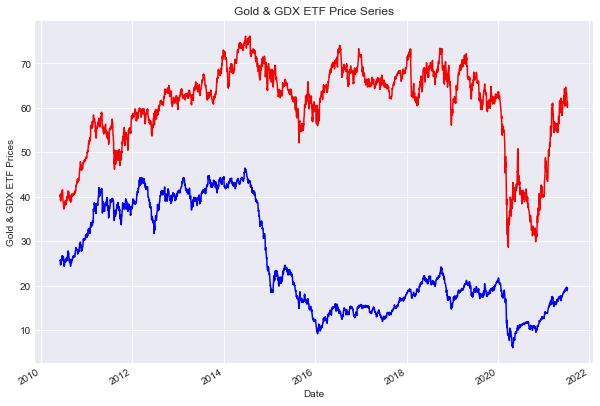

In [180]:
# Read data
Df = yf.download('XOM', '2008-01-01', current_date, auto_adjust=True)
Df1 = yf.download('BNO', '2008-01-01', current_date, auto_adjust=True)

# Only keep close columns
Df = Df[['Close']]
Df['Gold'] = Df1[['Close']]

# Drop rows with missing values
Df = Df.dropna()

# Plot the closing price of GLD
Df.Close.plot(figsize=(10, 7),color='r')
Df.Gold.plot(figsize=(10, 7),color='b')
plt.ylabel("Gold & GDX ETF Prices")
plt.title("Gold & GDX ETF Price Series")
plt.show()

In [181]:
Df.tail()

,Close,Gold
Date,,
2021-07-02,63.169998,19.650000
2021-07-06,61.369999,19.299999
2021-07-07,60.410000,18.830000
2021-07-08,60.139999,19.150000
2021-07-09,61.230000,19.469999


In [182]:
# Define explanatory variables
Df['S_3'] = Df['Gold'].shift(1)
#Df['S_9']= Df['Gold'].shift(1).rolling(window=9).mean()

#Df['S_3_silver'] = Df['Silver'].shift(1).rolling(window=3).mean()
#Df['S_9_silver']= Df['Silver'].shift(1).rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)
Df= Df.dropna()

#X = Df[['S_3','S_9','S_3_silver','S_9_silver']]
#X = Df[['S_3', 'S_9']]
X = Df[['S_3']]

# Define dependent variable
y = Df['next_day_price']

In [183]:
# Split the data into train and test dataset
t = .8
t = int(t*len(Df))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [184]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)
#print("Linear Regression model")
#print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
#+ %.2f * 9 Days Moving Average (x2) \
#+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

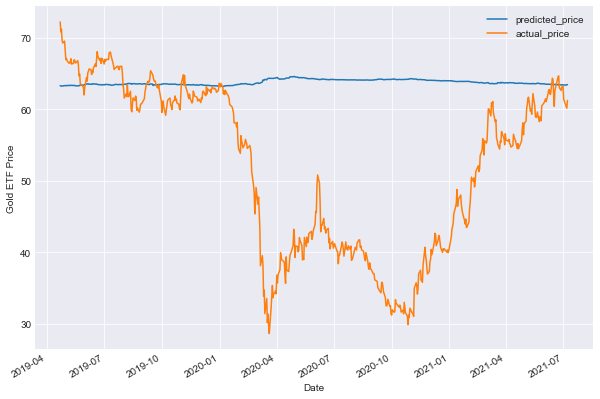

In [185]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

In [186]:
# R square
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

-109.79

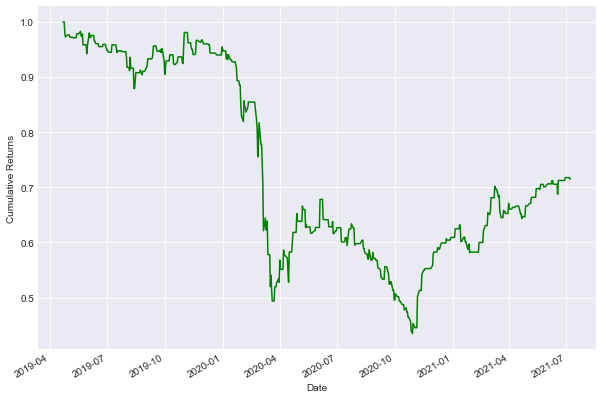

Date,2021-07-08
signal,1.000000
predicted_price_next_day,63.445713


In [187]:
gold = pd.DataFrame()

gold['price'] = Df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)

gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)

gold['strategy_returns'] = gold.signal * gold['gold_returns']
((gold['strategy_returns']+1).cumprod()).plot(figsize=(10,7),color='g')
plt.ylabel('Cumulative Returns')
plt.show()
gold.tail(1)[['signal','predicted_price_next_day']].T

In [188]:
gold['Bay_&_hold_gold'] = (gold['gold_returns'] + 1).cumprod()
gold['Strategy_cum'] = (gold['strategy_returns'] + 1).cumprod()

In [189]:
cumulative_return_gld = gold['Bay_&_hold_gold'][-2] - 1
cumulative_return_str = gold['Strategy_cum'][-2] - 1
print("Доходность по купи и держи")
print("cumulative_return =", "%.2f%%" % (100 * cumulative_return_gld))
print("Доходность по алгостратегии")
print("cumulative_return =", "%.2f%%" % (100 * cumulative_return_str))
print('The Sharpe ratio B&H strategy ', round(np.mean(gold['gold_returns'])/np.std(gold['gold_returns'])*(252**0.5),2), '%' )
print('The Sharpe ratio алго strategy ', round(np.mean(gold['strategy_returns'])/np.std(gold['strategy_returns'])*(252**0.5),2), '%' )

Доходность по купи и держи
cumulative_return = -16.23%
Доходность по алгостратегии
cumulative_return = -28.55%
The Sharpe ratio B&H strategy  0.0 %
The Sharpe ratio алго strategy  -0.36 %
